RFI testing outside with the Log Periodic antenna

In [2]:
# set your file set here!

fileset='*.csv'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py,glob
plt.rcParams.update({'font.size': 18})

In [4]:
def VNAtranslator(allscans, rows_to_cut=51):
    freqs = []
    mags = []
    for i in range(len(allscans)):
        data = []
        with open(allscans[i], 'rt') as f:
            reader = csv.reader(f)
            for row in reader:
                 #print(row)
                data.append(row)
        data_np = np.array(data)
        datafinal = data_np[rows_to_cut:-1]
        #print(datafinal)
        df=[]
        freq1 = []
        mag1 = []
        for i in datafinal:
            freq1.append(float(i[0]))
            mag1.append(float(i[1]))   
        freqs.append(freq1)
        mags.append(mag1)
    return(freqs,mags)

In [5]:
allscans=np.sort(glob.glob(fileset))
if("test_1" in fileset):
    allscans=allscans[:-1]
print(allscans)

freqs,mags=VNAtranslator(allscans = allscans, rows_to_cut=51)

allscans_empty = allscans
freqs_empty = freqs
mags_empty = mags  

    
#for i, arr in enumerate(mags_empty):
#    mags[i] = np.subtract(mags[i], calibration)
    



['rfi-log-per-0.csv' 'rfi-log-per-001.csv' 'rfi-log-per-002.csv'
 'rfi-log-per-003.csv' 'rfi-log-per-004.csv' 'rfi-log-per-005.csv'
 'rfi-log-per-006.csv' 'rfi-log-per-007.csv']


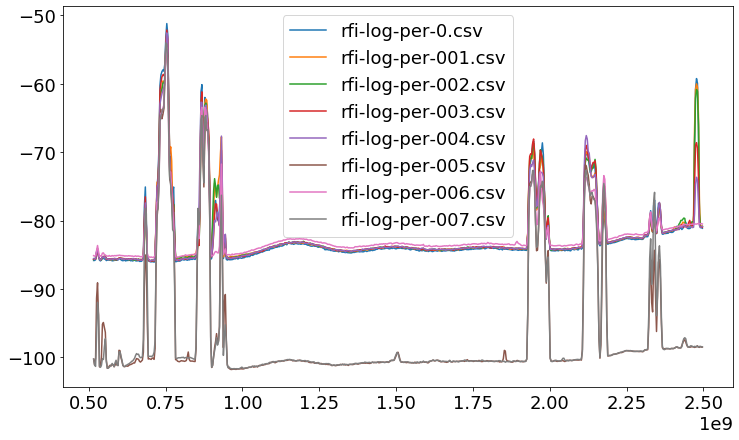

In [7]:
plt.figure(figsize=(12,7))
plt.rcParams.update({'font.size': 18})
for i in range(len(freqs)):
    plt.plot(freqs[i],mags[i],label=allscans[i])
#plt.ylim(-5,0.1)
plt.legend()
plt.show()

'\nplt.figure(figsize=(12,7))\n\nplt.plot(freqs[0], mags[0], label="Baseline")\nplt.plot(freqs[5], mags[5], label="Drone, Remote, iPad")\n\nplt.xlabel("Frequency [GHz]")\nplt.ylabel("Magnitude [dBm]")\nplt.title("Drone RFI measurements in the cage: 500-2500 MHz")\nplt.legend()\nplt.grid()\nplt.savefig("drone_connected.png")\nplt.show\n'

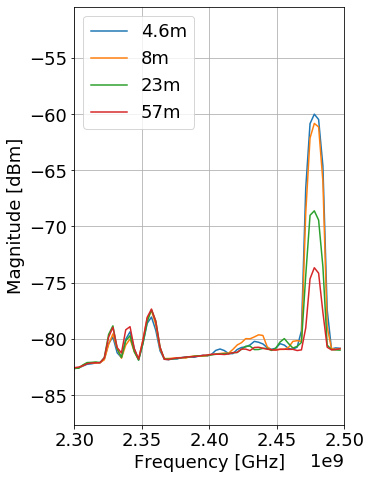

In [16]:
plt.figure(figsize=(5.5,7))
plt.rcParams.update({'font.size': 18})
plt.plot(freqs[1], mags[1], label="4.6m")
plt.plot(freqs[2], mags[2], label="8m")
plt.plot(freqs[3], mags[3], label="23m")
plt.plot(freqs[4], mags[4], label="57m")
#plt.plot(freqs[6], mags[6], label="Baseline (~30m later)")

plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
#plt.title("Drone RFI measurements outdoors at LFOP")
plt.xlim(2300000000,2500000000)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("drone_connected_cut.png")
plt.show

"""
plt.figure(figsize=(12,7))

plt.plot(freqs[0], mags[0], label="Baseline")
plt.plot(freqs[5], mags[5], label="Drone, Remote, iPad")

plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("Drone RFI measurements in the cage: 500-2500 MHz")
plt.legend()
plt.grid()
plt.savefig("drone_connected.png")
plt.show
"""